In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data_updated = pd.read_csv("german_credit_data.csv")
data_updated.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


### Étape 1 : Nettoyage des données et gestion des valeurs manquantes

In [63]:
# Supprimer la colonne inutile 'Unnamed: 0'
data_cleaned = data_updated.drop(columns=['Unnamed: 0'])

# Remplir les valeurs manquantes
# Remplissage par une catégorie "unknown" pour les colonnes catégoriques
data_cleaned['Saving accounts'] = data_cleaned['Saving accounts'].fillna('unknown')
data_cleaned['Checking account'] = data_cleaned['Checking account'].fillna('unknown')

# Vérification après nettoyage
print(data_cleaned.isnull().sum())
print(data_cleaned.head())


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own         unknown           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little          unknown           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car  


### Étape 2 : Analyse exploratoire et corrélations

<function matplotlib.pyplot.show(close=None, block=None)>

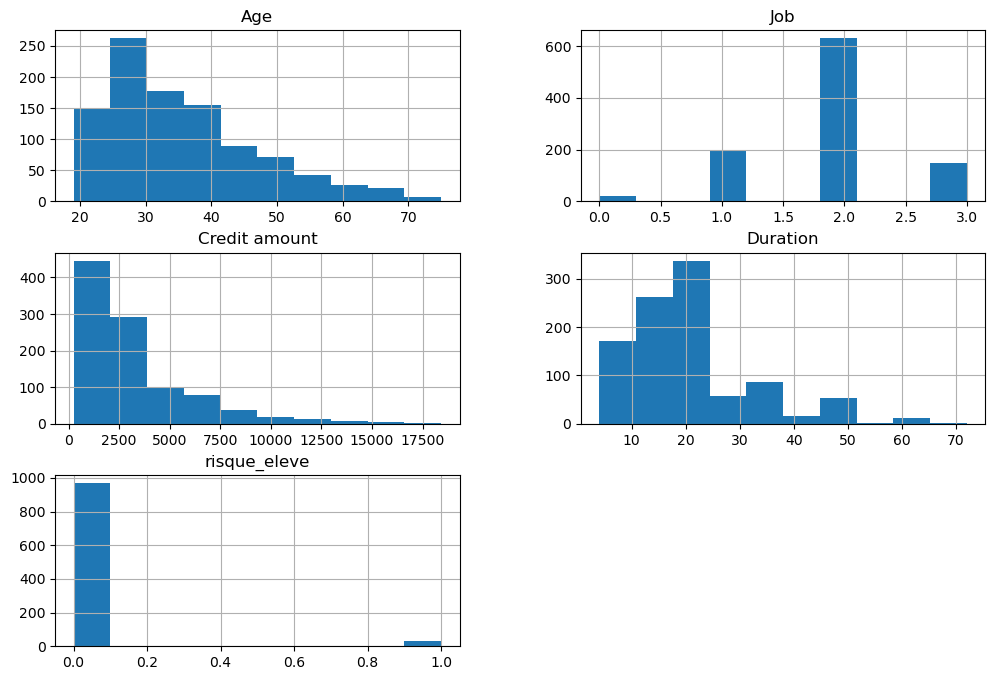

In [79]:
data_encoded.hist(figsize =(12,8))
plt.show

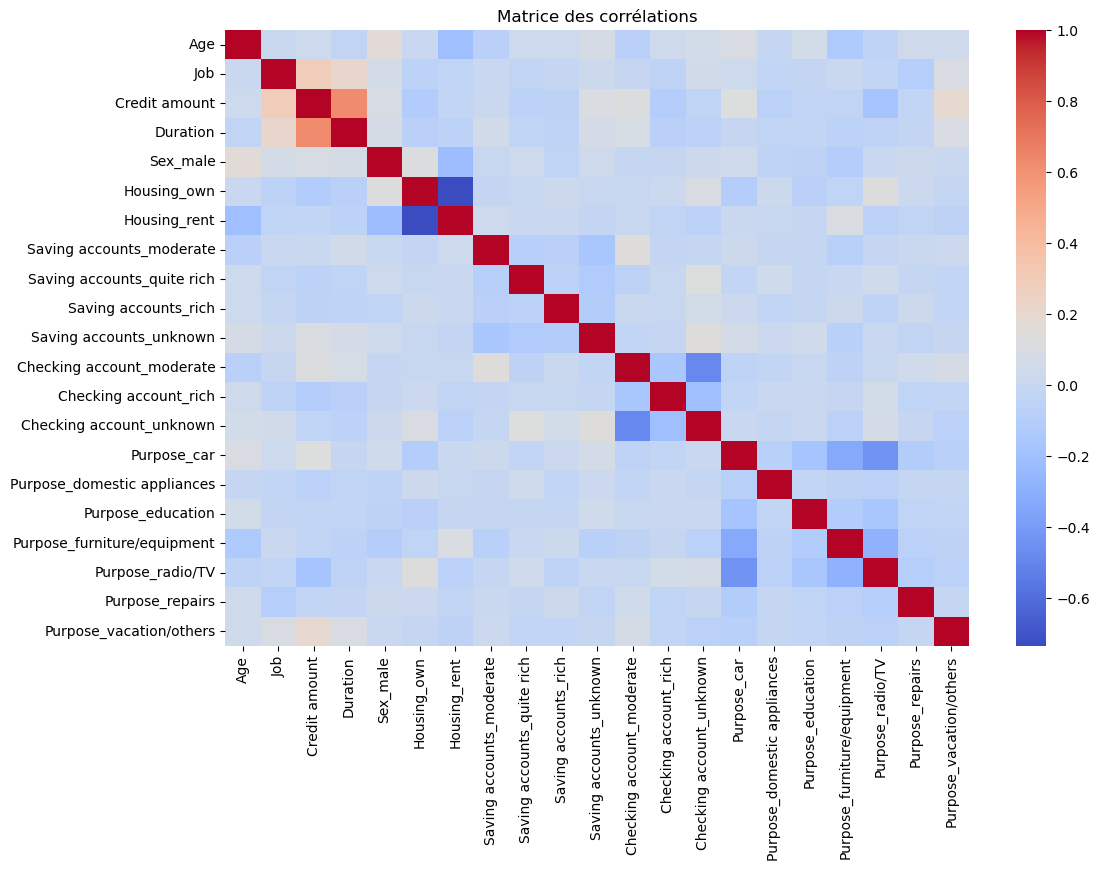

Credit amount                  1.000000
Duration                       0.624984
Job                            0.285385
Purpose_vacation/others        0.192893
Purpose_car                    0.125575
Checking account_moderate      0.119612
Saving accounts_unknown        0.106546
Sex_male                       0.093482
Age                            0.032716
Saving accounts_moderate       0.013546
Housing_rent                  -0.024611
Purpose_repairs               -0.028875
Purpose_furniture/equipment   -0.034037
Purpose_education             -0.034796
Checking account_unknown      -0.039485
Saving accounts_rich          -0.055542
Saving accounts_quite rich    -0.064256
Purpose_domestic appliances   -0.069268
Checking account_rich         -0.100510
Housing_own                   -0.117497
Purpose_radio/TV              -0.173203
Name: Credit amount, dtype: float64


In [67]:

# Convertir les colonnes catégoriques en variables numériques pour l'analyse des corrélations
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Calculer les corrélations
correlation_matrix = data_encoded.corr()

# Visualiser les corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Matrice des corrélations')
plt.show()

# Identifier les corrélations les plus fortes avec 'Credit amount'
print(correlation_matrix['Credit amount'].sort_values(ascending=False))


 ### Idendification d'une variable cible proxy

 Supposons que si le credit est supérieur à 10000 et que la durée est supérieur est 24 , le risque est élevé .

In [81]:
# Creer une variable binaire " risque elevé " en fonction de seuils
data_encoded['risque_eleve'] = 0
data_encoded.loc[(data_encoded['Credit amount'] > 10000) & (data_encoded['Duration'] > 24) , 'risque_eleve' ] = 1

### Étape 3 : Développement d'un modèle de prédiction

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

# Séparer les données en entrainement et test
X = data_encoded.drop('risque_eleve' , axis = 1)
Y = data_encoded['risque_eleve']
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)

# Entrainer un modele de regression logistique
model = LogisticRegression()
model.fit(X_train , Y_train)

#Evaluer les performances du modele
Y_pred = model.predict(X_test)
print('Accuracy:',accuracy_score(Y_test,Y_pred))
print('Precision:', precision_score(Y_test , Y_pred))
print('Recall:', recall_score(Y_test , Y_pred))
print('f1-score:' , f1_score(Y_test , Y_pred))


#print(Y_pred)
X.shape
Y.shape

Accuracy: 0.995
Precision: 0.75
Recall: 1.0
f1-score: 0.8571428571428571


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1000,)

In [125]:
#X.loc[20]
#Y[21]
index = []
for i , value in enumerate(Y):
    if value == 1:
        index.append(i)

#print(index)
X.loc[63]

Age                               25
Job                                2
Credit amount                  14421
Duration                          48
Sex_male                        True
Housing_own                     True
Housing_rent                   False
Saving accounts_moderate       False
Saving accounts_quite rich     False
Saving accounts_rich           False
Saving accounts_unknown        False
Checking account_moderate       True
Checking account_rich          False
Checking account_unknown       False
Purpose_car                    False
Purpose_domestic appliances    False
Purpose_education              False
Purpose_furniture/equipment    False
Purpose_radio/TV               False
Purpose_repairs                False
Purpose_vacation/others        False
Name: 63, dtype: object

### Étape 4 : Création d'un Dockerfile

In [128]:
# Utiliser une image Python officielle
FROM python:3.9-slim

# Définir le répertoire de travail
WORKDIR /app

# Copier le fichier requirements.txt et installer les dépendances
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

# Copier le reste du code dans le conteneur
COPY . .

# Spécifier la commande à exécuter
CMD ["python", "main.py"]


SyntaxError: invalid syntax (1037376315.py, line 2)